# Introduction

This a case study about a *wellness app* produced by Bellabeat, a high-tech company that manufactures health-focused smart products. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.

##### Bellabeat app
The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

<img src="https://img.freepik.com/free-vector/girl-training-sport-gym-set-active-sporty-woman-sportswear-stretching-body-doing-yoga-physical-exercises-with-dumbbells-fitness-workout-lifestyle-concept_575670-1458.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid
" width="50%">


# Parameters for the analysis - ASK Phase
<img src="https://img.freepik.com/premium-vector/questions-answers-icon-question-support-icon-logo-isolated-sign-symbol-vector_662353-283.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid)" width="12%">

#### Business Task
The goal of this work is to analyze smart device usage data in order to gain insight into how people are using other smart devices. Then, using this information, provide high-level recommendations for how these trends can inform Bellabeat marketing strategy.

For this, we will go through all the six phases of data analsys - ask, prepare, process, analyze, share and act - ending with the recommendations for the marketing to team and all stakeholders.

#### Key Stakeholders
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.


# Data Integrity and Tools | PREPARE Phase

<img src="https://img.freepik.com/free-vector/scheduling-planning-setting-goals-schedule-timing-workflow-optimization-taking-note-assignment-businesswoman-with-timetable-cartoon-character-vector-isolated-concept-metaphor-illustration_335657-2851.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid)" width="12%">

The dataset used is the **"FitBit Fitness Tracker Data"**, which is dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. It is a CC0 - Public Domain license, which means it can be freely used here.

All other data sources, such as papers and researches are dutifully cited as follows.





## Tools Used
For this project, the main tool used is ***R***. That is because, although we are dealing with a relatively small dataset, R could fulfill all the processing, cleaning, modeling and presenting of the dataset and its findings in a concise and elegant way, without the need to address other visual tools, for example.

# Cleaning, processing and modeling | PROCESS Phase

<img src="https://img.freepik.com/free-vector/flat-timeline-infographic-template_23-2148355304.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid)" width="16%">

## Cleaning steps

These are the steps took in order to assure the data is clean and ready to use:

* Determine the size of the dataset
* Determine the number of categories or labels
* Identify missing data
* Identify unformatted data
* Explore the different data types

#### Beginning the processing
First, load all the packages that are going to be used in the job.

In [1]:
library(tidyverse)
library(lubridate)
library(janitor)
library(ggplot2)
library(tidyr)
library(skimr)
library(dplyr)
library(forcats)
library(viridis)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Loading required package: viridisLite



Now select all the tables that will be used for the analysis. The table dailyActivity contains all the variables that the other 'daily' tables contain, so no need to load them all.

Then, sort the data and assign easier names for each table.

In [2]:
activity <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
calories <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
heart <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_steps <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")


#### Let`s check the name of the columns to see what are we dealing with and start **brainstorming** for insights

In [3]:
colnames(activity)
colnames(sleep)
colnames(weight)
colnames(heart)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"    "Time"  "Value"

***Important note:*** Although the data source seems to be reliable, the data itself might be biased, because there is no information whatsoever about the people that provided the data. This could skew the results and give insights that are not really useful for the business

#### Now let's check the size and structure of the dataset


In [4]:
str(activity)
str(sleep)
str(weight)
str(intensities)
str(hourly_steps)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


#### Next we check for null values and the need for getting rid of them or not.

As we can see, only the weight table has some null values. This will not be a problem, as it will be revealed in the analysis phase.

In [5]:
colSums(is.na(activity))
colSums(is.na(sleep))
colSums(is.na(weight))
colSums(is.na(heart))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

Id  Time Value 
    0     0     0

#### Finally, it is important to assure all the data types are compatible for the analysis.

In here, we remove the hour from the daily tables, since they don't matter for the analysis (we analyse the whole day) and give a more consistent timestamp for the hourly tables.

In [6]:
slp <- sleep
slp <- slp %>%
  mutate(SleepDay = as.Date(sub(" .*", "", SleepDay), format = "%m/%d/%Y"))
act <- activity
act <- act %>%
  mutate(ActivityDate = as.Date(ActivityDate, format = "%m/%d/%Y"))
wei <- weight
wei <- wei %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))
int <- intensities %>%
  mutate(ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")) %>%
    separate(col = ActivityHour, into = c("Date", "Time"), sep = " ", fill = "right") %>%
    mutate(Time = ifelse(is.na(Time), "00:00:00", Time))
head(int)


,Id,Date,Time,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<chr>,<int>,<dbl>
1,1503960366,2016-04-12,00:00:00,20,0.333333
2,1503960366,2016-04-12,01:00:00,8,0.133333
3,1503960366,2016-04-12,02:00:00,7,0.116667
4,1503960366,2016-04-12,03:00:00,0,0.000000
5,1503960366,2016-04-12,04:00:00,0,0.000000
6,1503960366,2016-04-12,05:00:00,0,0.000000


## Cleaning summary
* The 'activity' table is the one with most variables;
* With the exception of the 'heart' table, the dataset is not very large; Despite that, R is the best choice for this job, because of its resources for cleaning, analyzing and creating visuals, all in one tool;
* The 'weight' table is the only one with "NA" (null) values. This will be addressed later on;
* Since all sleep days begin at midnight, the time was excluded from the timestamp. All other tables 'date' columns were standardized;


# Trends and Calculations | ANALYZE and SHARE Phases

<img src="https://img.freepik.com/free-vector/company-annual-report-analyzing-business-analysis-diagram-analytics-statistics-employee-holding-magnifying-glass-male-cartoon-character_335657-249.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid)" width="16%">

Now we are ready to explore all the information this data provides us. First, let's summarize it

## Summary statistics

### Participants
As it is seen, the number of participants in the weight measures is **too low** compared to the rest, which may not give us a good metric to work with.

In [7]:
cat("The number of participants in each register is as follows:\n",
    "Daily Activities:", n_distinct(act$Id), "\n",
    "Sleep Days:", n_distinct(slp$Id), "\n",
    "Weight Log:", n_distinct(wei$Id), "\n",
    "Hourly Intensity", n_distinct(intensities$Id), "\n",
    "Hourly Steps:", n_distinct(hourly_steps$Id), "\n",
    "Hourly Calories:", n_distinct(hourly_calories$Id), "\n")

The number of participants in each register is as follows:
 Daily Activities: 33 
 Sleep Days: 24 
 Weight Log: 8 
 Hourly Intensity 33 
 Hourly Steps: 33 
 Hourly Calories: 33 


### Statistics about the tables



In [8]:
act %>% select(TotalSteps, TotalDistance, SedentaryMinutes, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()
slp %>% select(TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes VeryActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.00   
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:  0.00   
 Median : 7406   Median : 5.245   Median :1057.5   Median :  4.00   
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   : 21.16   
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.: 32.00   
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :210.00   
 FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00      1st Qu.:127.0       
 Median :  6.00      Median :199.0       
 Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :143.00      Max.   :518.0       

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

### From this, some conclusions arrise:
* The 'mean' and the 'max' of Very Active minutes is higher the Fairly Active's. This could indicate that most participants are havy pracicants of physical activities
* The mean of Total Steps in a day is considerably high, leading to the same conclusion as before.



## Trends and Correlations

As it is expected, there is a high correlation between the total steps one takes in a day and total calories bunt. The more people walk, the more calories are gone.

However, the correlation between sedentary time and steps taken is not so high, which indicates that *people are only active in a small portion of the day*. According to Harvard University, sitting for long, uninterrupted periods of time may leave a person more prone to cardiovascular problems.

[1 - link for the article](http://https://www.health.harvard.edu/heart-health/why-you-should-move-even-just-a-little-throughout-the-day)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


Correlation between Total Steps and Sedentary Minutes in a Day is: -0.33 


Correlation between Total Steps and Calories in a Day is: 0.45

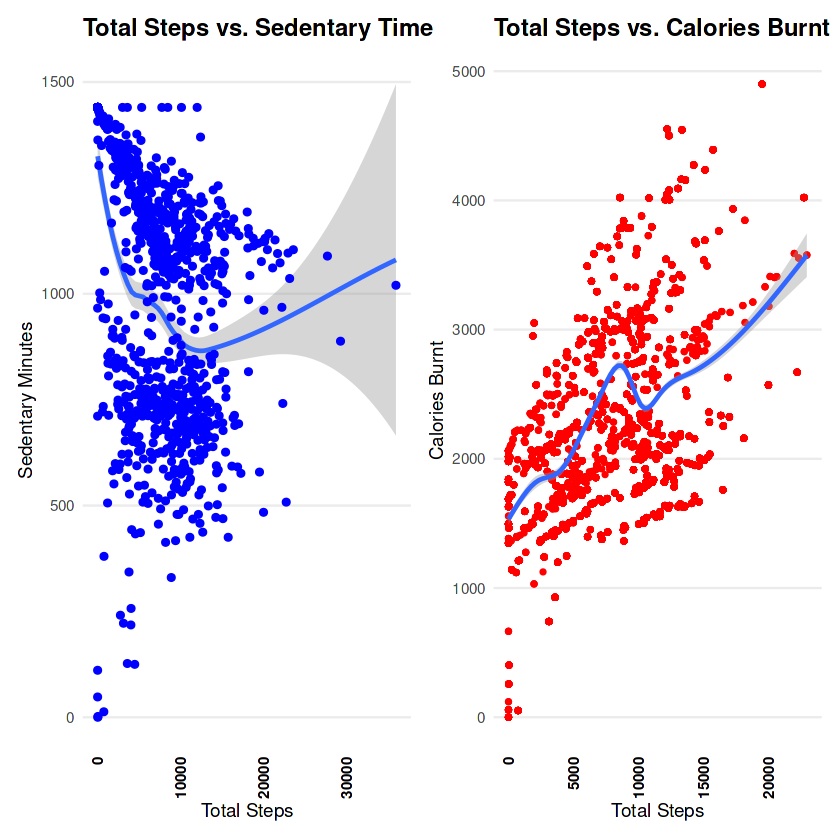

In [9]:
p1 <- ggplot(data=act, aes(x=TotalSteps, y=SedentaryMinutes)) +
    geom_smooth() +
    geom_point(color = "blue") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, color = "black", face = "bold"),
        plot.title = element_text(face = "bold", size = 14),
        panel.grid.major.x = element_blank(),
        panel.grid.minor = element_blank()
    ) +
    labs(
        title = "Total Steps vs. Sedentary Time",
        x = "Total Steps",
        y = "Sedentary Minutes"
    )

act_slp_combined <- merge(act, slp, by="Id")
p2 <- ggplot(data=act_slp_combined, aes(x=TotalSteps, y=Calories)) +
    geom_jitter(color = "red", size = 1, width = 0.1) +
    geom_smooth() +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, color = "black", face = "bold"),
        plot.title = element_text(face = "bold", size = 14),
        panel.grid.major.x = element_blank(),
        panel.grid.minor = element_blank()
    ) +
    labs(
        title = "Total Steps vs. Calories Burnt",
        x = "Total Steps",
        y = "Calories Burnt"
    )

p1 | p2

cat("Correlation between Total Steps and Sedentary Minutes in a Day is:",
    round(cor(act$TotalSteps, act$SedentaryMinutes, use = "complete.obs", method = "pearson"), 2), "\n")
cat("Correlation between Total Steps and Calories in a Day is:",
    round(cor(act_slp_combined$TotalSteps, act_slp_combined$Calories, use = "complete.obs", method = "pearson"), 2))

##### This correlation tells us that the app could engage the user to spread its actvities throughout the day, thus reducing the sedentary minutes and improving the burn of calories


### Showcasing the relation between total active minutes and sedentary minutes

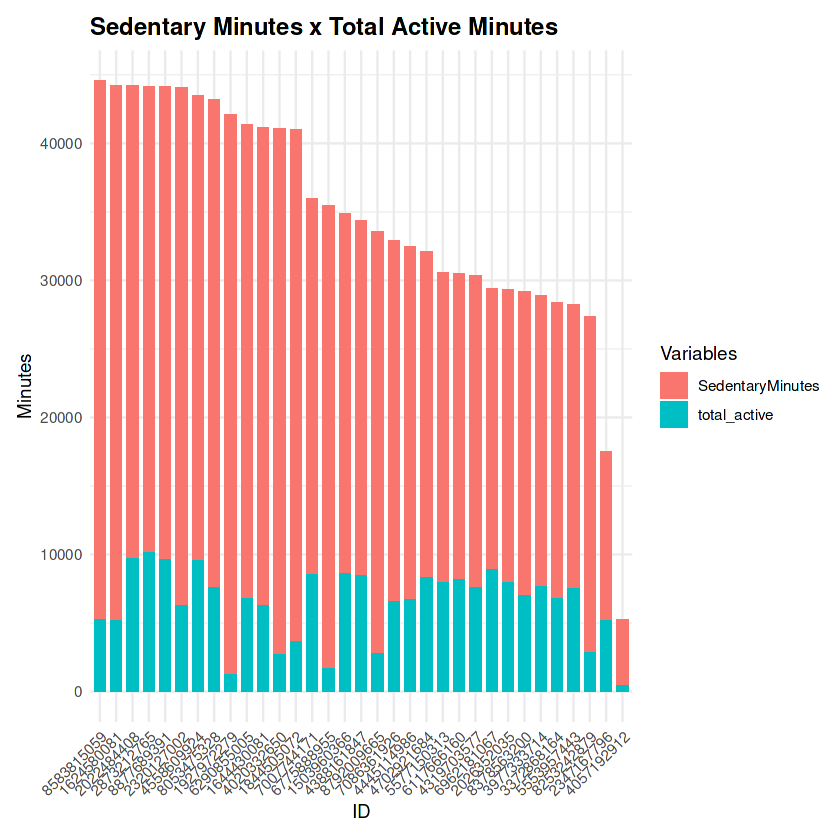

In [10]:
act <- act %>%
    mutate(total_active = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

act_long <- act %>%
    pivot_longer(cols = c("total_active", "SedentaryMinutes"),
                 names_to = "Variables",
                 values_to = "Valor")

act_long_grouped <- act_long %>%
  group_by(Id, Variables) %>%
  summarise(Valor = sum(Valor), .groups = "drop") %>%
  mutate(Id = fct_reorder(factor(Id), Valor, .fun = sum, .desc = TRUE))

ggplot(act_long_grouped, aes(x = factor(Id), y = Valor, fill = Variables)) +
  geom_bar(stat = "identity", position = "stack", width = 0.7) +
  labs(title = "Sedentary Minutes x Total Active Minutes",
       x = "ID",
       y = "Minutes") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold", size = 14),
    plot.margin = margin(10, 10, 10, 10),
    plot.background = element_rect(fill = "white", colour = "NA")
  )

##### There is no pattern that indicates why there is such discrepancy among the users. Better engagement with the app might lead to less sedentary time for all the users.

In [11]:
act <- act %>%
    mutate(total_active = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
mean_total <- mean(act$total_active) / mean(act$SedentaryMinutes / 100)
mean_very <- mean(act$VeryActiveMinutes) / mean(act$SedentaryMinutes / 100)

cat("Ratio for:\n",
    "Total time spent active vs. Sedentary time:", sprintf("%.2f%%", mean_total), "\n",
    "Very active Minutes vs. Sedentary time:", sprintf("%.2f%%", mean_very), "\n")


Ratio for:
 Total time spent active vs. Sedentary time: 22.96% 
 Very active Minutes vs. Sedentary time: 2.14% 


### Hourly activities
This is a crucial data that can help notifying people at the *right time*.

#### The time of the day where people are most active is between 17:00 and 19:00

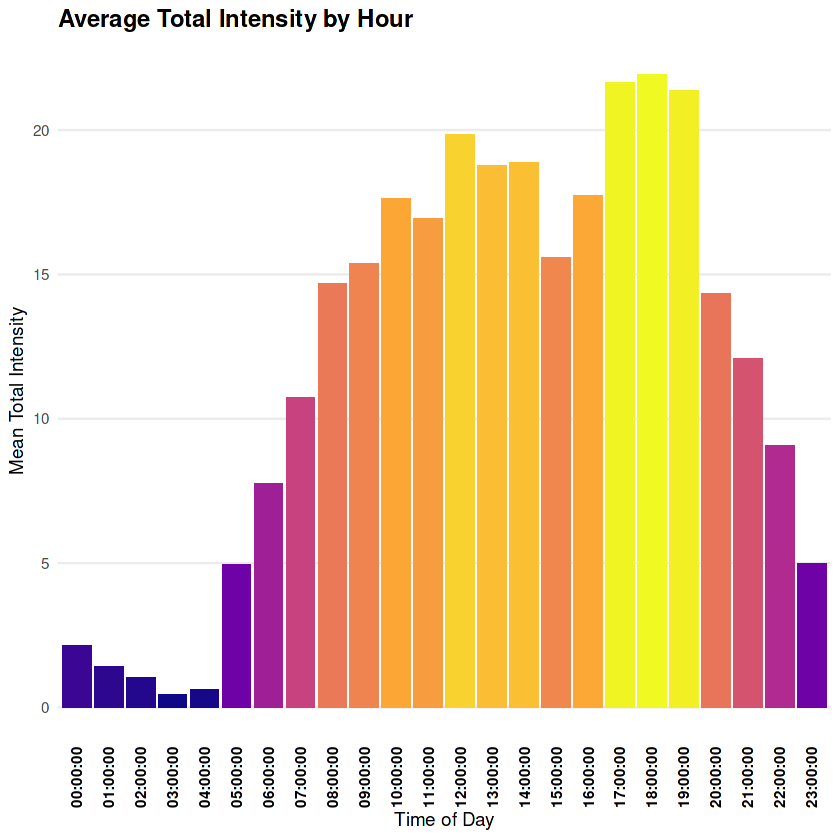

In [12]:
int_new <- int %>%
  group_by(Time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data = int_new, aes(x = Time, y = mean_total_int, fill = mean_total_int)) +
  geom_col(show.legend = FALSE) +
  scale_fill_viridis_c(option = "plasma") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "Average Total Intensity by Hour",
    x = "Time of Day",
    y = "Mean Total Intensity"
  )

Also, there is a clear high correlation between the time spent in bed and time actually asleep. However, there are some **outliers**.

##### For those the app could send notifications for them to get ready to bed and create a **routine** that will make them have better quality sleep time.

Correlation between Total Time in Bed and Total Time Asleep is: 0.93

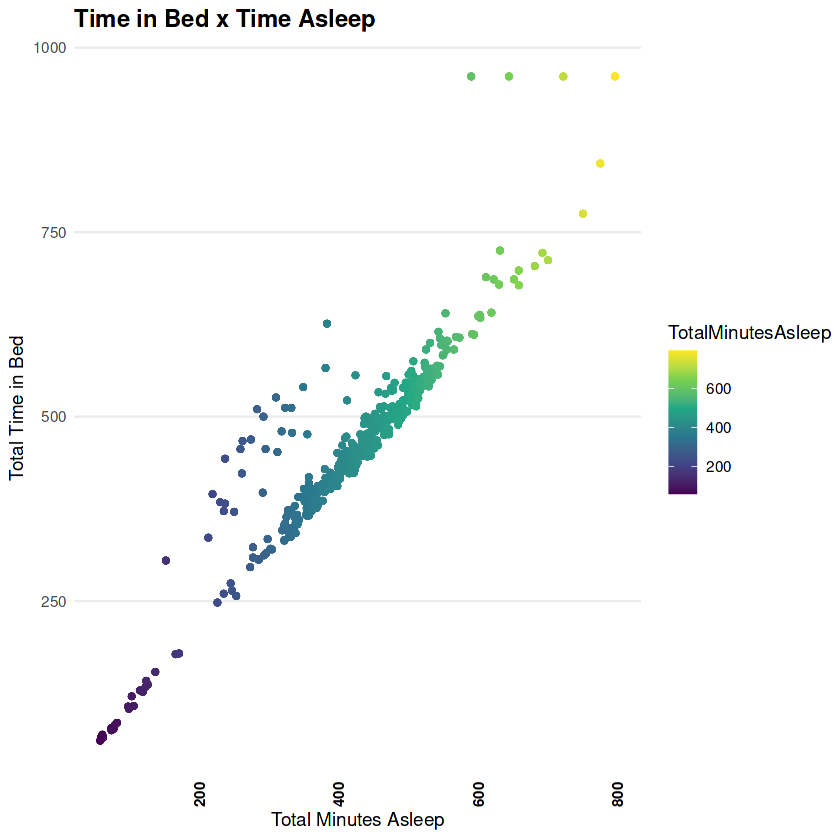

In [13]:
ggplot(data=act_slp_combined, aes(x=TotalMinutesAsleep, y=TotalTimeInBed, color = TotalMinutesAsleep)) +
    geom_jitter(size = 1) +
    scale_color_viridis_c() + 
    theme_minimal() +
    theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "Time in Bed x Time Asleep",
    x = "Total Minutes Asleep",
    y = "Total Time in Bed"
  )


cat("Correlation between Total Time in Bed and Total Time Asleep is:",
    round(cor(act_slp_combined$TotalMinutesAsleep, act_slp_combined$TotalTimeInBed, use = "complete.obs", method = "pearson"), 2))

##### Lastly, we wanted to check if there is a correlation between the amount of steps one takes during the day and their sleep time.

Correlation between Total Steps and Total Minutes Asleep is: -0.1

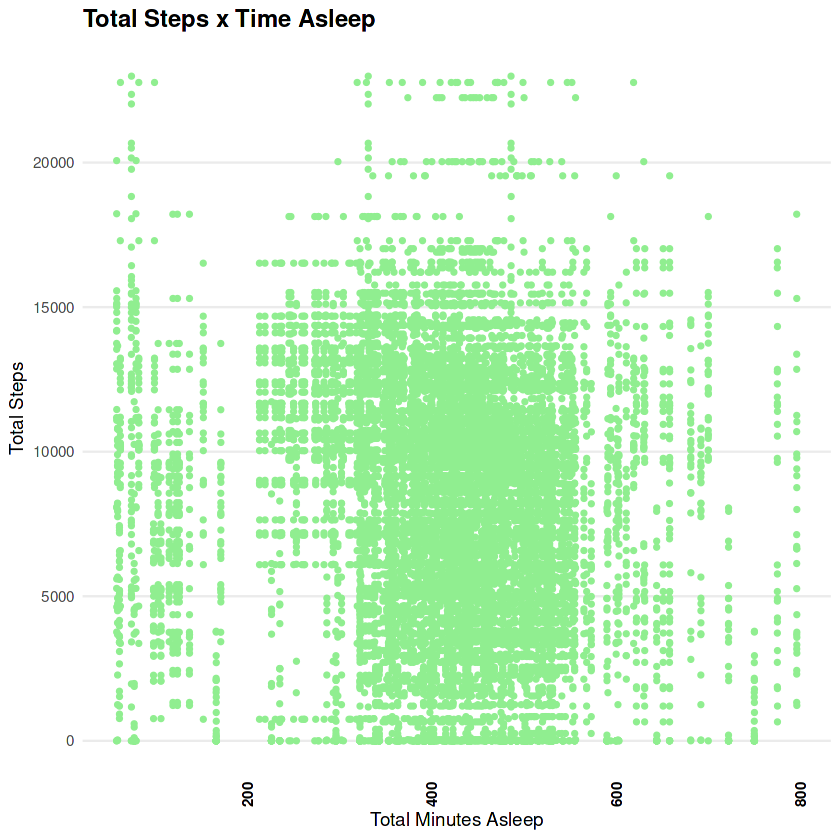

In [14]:
act_slp_combined <- merge(act, slp, by="Id")
ggplot(data=act_slp_combined, aes(x=TotalMinutesAsleep, y=TotalSteps)) +
    geom_jitter(color = "lightgreen", size = 1, width = 0.1) +
    theme_minimal() +
    theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, color = "black", face = "bold"),
    plot.title = element_text(face = "bold", size = 14),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "Total Steps x Time Asleep",
    x = "Total Minutes Asleep",
    y = "Total Steps"
  )

cat("Correlation between Total Steps and Total Minutes Asleep is:",
    round(cor(act_slp_combined$TotalMinutesAsleep, act_slp_combined$TotalSteps, use = "complete.obs", method = "pearson"), 2))

Unfortunately, there isn't.

# Conclusions | ACT Phase

<img src="https://img.freepik.com/free-vector/workout-clothes-fashion-trendy-sportswear-sports-uniform-fitness-look-female-athlete-sportswoman-exercising-fashionable-gym-apparel_335657-3601.jpg?ga=GA1.1.1586763010.1739990927&semt=ais_hybrid)" width="16%">


As a product that combines wellness and fashion, designed exclusively for women, there is a great potential for growth if it delivers and addresses the issues that its clients face everyday. More specifically, the app could do much better with a few improvements, such as will be appointed next.

For that, it is crucial that Bellabeat collect and process all the data that its devices and app collects, in order to produce the best insights possible for improving its products.



## List of recomendations

#### 1. *Minutes asleep* - to improve overall health
The participants in the dataset seemed to demonstrade good sleeping habits, tending not to stay in bed without sleeping longer than necessary. Although the sample is relatively small, some *outliers* coulb be seen.
The app could track these habits and sugest more tips for better quality sleep, both throughout the day and also in a time where the user sets its their usual time to go to bed.

#### 2. *Gamification and Social Interaction* - for engaging the practice of physical activities
This is already a proven method - users tend to engage more if there is a system that let them earn rewards and interact with other people.
The suggestion here is to create some type of gaming system that allow users to earn rewards (even symbolic) and compare themselves in a sort of rank.

#### 3. *Less Sedentary Time* - to improve life quality
Physical activity, despite its intensity, should not be reserved for an specific hour of the day. Staying active for longer periods reduce the risks os serious diseases.
The app and the company overall may remind its users, clients and enthusiasts about this fact and at the same time guarantee everyone is going to, not only build better habits, but also use/wear its products with more frequency, increasing the engagement and loyalty for the brand.